# SURROGATE MODELS POSTPROCESSING NOTEBOOK

This python notebook is used to generate effective plots for the results obtained on an X-capacitive accelerometer, accounting for unknown overecth, offset and thickness.

We will start by training the surrogate modelling, plotting the predictions, and then we will start the identiifcation procedure.

##### Importing Necessary Libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../../src/SurrogateModeling')
sys.path.append('../../src/utils/')

from model import NN_Model
from training import train
from preprocessing import preprocessing
from postprocessing import *

## First Surrogate Model training

We start training the surrogate model, in order to do so we use the corresponding configuration file. In addition we set some values in order to hide confidential information in the plots.

In [2]:
# CONFIGURATION FILE
CONFIGURATION_FILE = './config_I_fft.json'

mean_overetch = 0.3
mean_offset = 0.0
mean_thickness = 30.0
mean_qFactor = 0.5

sigma_O = 0.2
sigma_U = 0.5
sigma_T = 1.0
sigma_Q = 0.1 

We start importing the dataset, through the preprocessing utility. Then we plot the data, subdivided in validation and training sets

(640, 4)


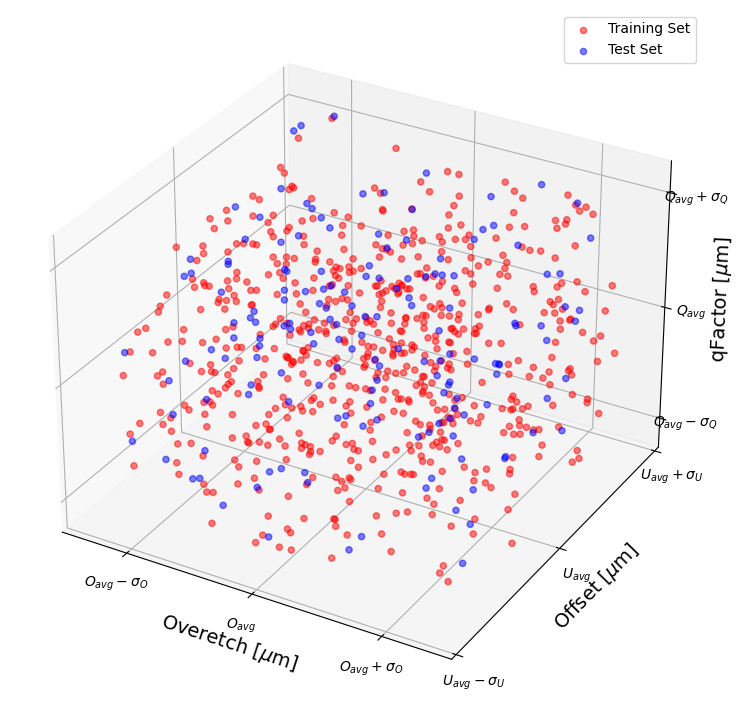

In [3]:
# Preprocessing
data_processor = preprocessing(CONFIGURATION_FILE)

# Collecting traing and Testing Data
X_train = data_processor.X_train
X_test = data_processor.X_test
y_train = data_processor.y_train
y_test = data_processor.y_test

# Time steps of the simulations
time = data_processor.time

fs = 1e5;

# Scaled and processed data
X_train_scaled = data_processor.X_train_scaled
X_test_scaled = data_processor.X_test_scaled

print(X_train_scaled.shape)

labels = [
    'Overetch [${\mu}$m]', 
    'Offset [${\mu}$m]', 
    'qFactor [${\mu}$m]'
    ]

ticks = [
    [mean_overetch - sigma_O + 0.05, mean_overetch, mean_overetch + sigma_O - 0.05],
    [mean_offset - sigma_U + 0.05, mean_offset, mean_offset + sigma_U - 0.05],
    [mean_qFactor - sigma_Q + 0.01, mean_qFactor, mean_qFactor + sigma_Q-0.01]
]

ticks_labels = [
    ['$O_{avg}-\sigma_O$', '$O_{avg}$', '$O_{avg}+\sigma_O$'],
    ['$U_{avg}-\sigma_U$', '$U_{avg}$', '$U_{avg}+\sigma_U$'],
    ['$Q_{avg}-\sigma_Q$', '$Q_{avg}$', '$Q_{avg}+\sigma_Q$']
]


plot_dataset(X_train[:,[0,1,3]], X_test[:,[0,1,3]], features_labels=labels, features_ticks=ticks, features_ticks_labels=ticks_labels, digits='%.2f', projection='3d')

### Fast Fourier Transform

Here, we plot the fast Fourier transform of the results. We can use it to compress the signal information and accelrate identification


### Surrogate Model Training

Then, we train the model. If you want you can use a pretrained model, just changing the flag.

In [4]:
training = False

if training:
    train(CONFIGURATION_FILE)

model_I = NN_Model()
model_I.load_model(data_processor.config['MODEL_PATH'])

### Accuracy

We now plot the predictions of the surrogate model with respect to real validation data.

If the predictions are not accurate enough, enrich model, improve training parameter or increase the number of training epochs.

(160, 15)
[-166.8398    204.83354    33.2421    257.73438   289.86218   100.02017
   30.665031   39.245655 -182.97635   -54.61633  -252.55661   159.41144
  -70.98578    29.897785 -166.1721  ]
[-167.23032603  204.86758616   33.20724013  257.54976695  290.03355514
   99.98640317   30.6659353    39.47080375 -182.95418175  -54.51724492
 -252.39651251  159.3189151   -71.11090283   29.73399467 -166.04476796]


2024-05-09 08:35:39.927394: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


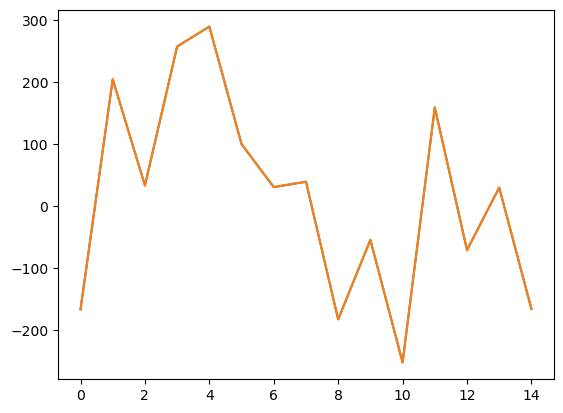

[ 325.85492   434.7989     66.26404   504.17126   575.15857   248.74721
   97.0615    144.11903  -180.79715   -46.38725  -236.01503   194.9308
  -17.480736   79.109604 -133.91156 ]
[ 325.99956114  434.84046064   66.37809962  503.85929407  575.50714399
  248.52501438   97.28540261  143.96870491 -180.91891391  -46.52251183
 -236.21067176  194.91685799  -17.52298009   78.50431346 -133.59034342]


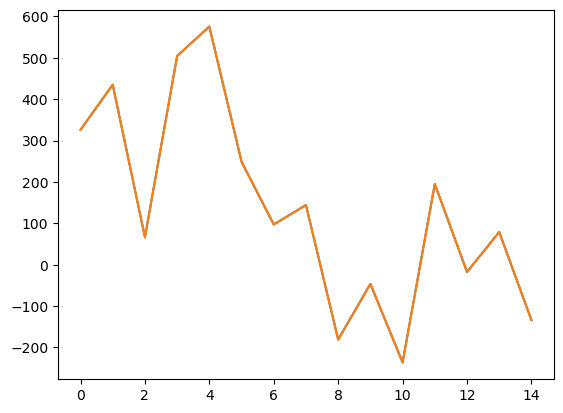

[ 764.5001    504.7833     83.26177   648.5963    799.5603    314.26965
   97.44205   128.23264  -183.43602   -40.12079  -245.01414   172.41167
  -67.5742     30.050783 -171.02473 ]
[ 766.90452924  506.28538647   83.0393518   649.57142904  802.22155916
  316.09266792   97.34729673  128.45258781 -183.41374159  -39.73867596
 -243.75976951  171.44295957  -67.97823714   30.12746319 -170.37279974]


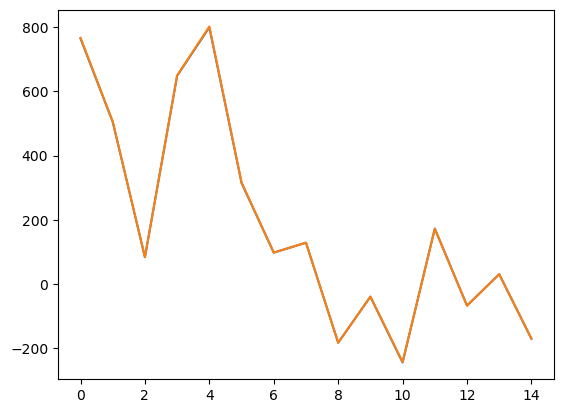

[-111.25187   359.6558     54.985466  420.23535   486.8938    221.41014
   90.64196   132.55905  -178.87698   -43.544735 -230.14203   204.99
   -4.594575   87.54588  -130.5531  ]
[-110.5053312   359.12531016   54.96290275  419.01320538  487.14583103
  220.63784465   90.83069993  133.99845717 -178.9418848   -43.48495217
 -229.79049203  204.64864158   -5.40174985   86.84402419 -130.38957822]


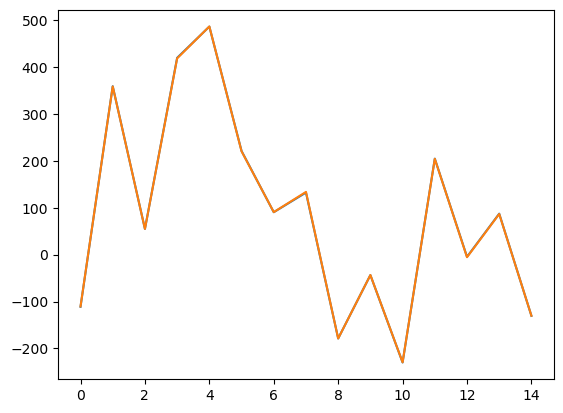

[-164.61192   221.57945    34.89654   262.02832   286.081     103.42529
   34.399277   46.31964  -183.7833    -55.84802  -252.22025   166.25552
  -55.70766    46.067062 -152.49928 ]
[-164.77194713  221.25076224   34.84476522  262.46972754  286.0216592
  103.33311977   34.30232264   46.16579912 -183.91673971  -56.15253969
 -252.26625344  166.1798685   -55.42134153   46.33565447 -152.2431952 ]


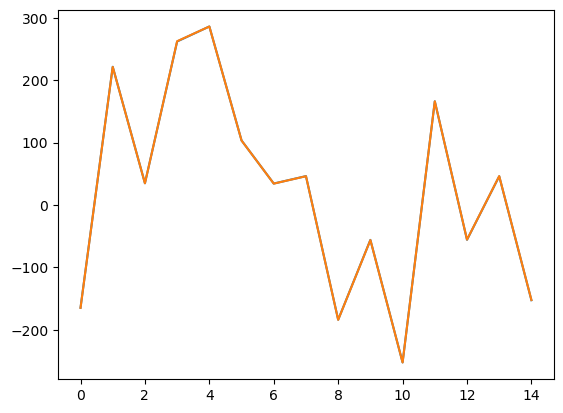

[ 521.17413   361.62814    61.137558  474.20844   561.43475   192.7756
   57.04019    75.03548  -183.24919   -48.543842 -250.93413   156.546
  -82.840706   20.103905 -174.73596 ]
[ 520.96401999  361.27046539   60.98838814  473.70137577  560.84354681
  192.76643441   57.0346004    74.9648782  -183.30363304  -48.87828528
 -250.99382029  156.49583177  -82.93323163   20.00047104 -175.03860202]


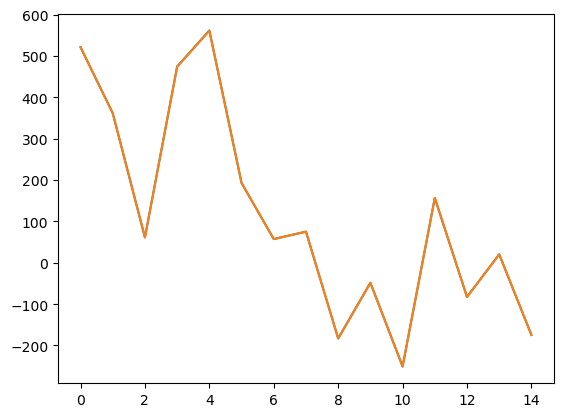

[1095.648     879.8843    129.57373  1048.3787   1264.5774    593.6496
  219.52292   322.07385  -182.2853    -36.81432  -234.23279   189.09537
  -31.37558    59.885147 -156.01828 ]
[1131.54838626  988.96984019  144.38732134 1149.56963185 1373.74817791
  662.15089906  262.64341859  416.98996491 -181.71134684  -38.99545147
 -233.42547972  199.60292029  -13.57231001   77.87373102 -143.72671902]


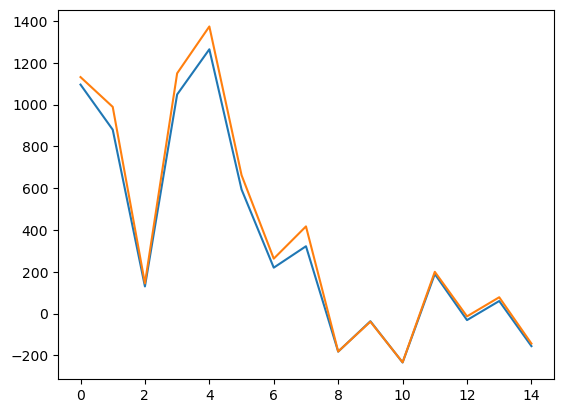

[-221.03639    167.40196     28.02809    240.17099    232.23044
   55.414722    15.446236    18.858162  -185.09375    -68.34906
 -276.13205    108.43494   -120.94578     -0.6738148 -191.15823  ]
[-221.33882937  167.20190855   27.99890611  240.32017219  232.28466292
   55.57114749   15.39114119   18.68974412 -185.04007627  -68.00953015
 -276.1634892   108.45069694 -120.78849571   -0.52127011 -191.03762254]


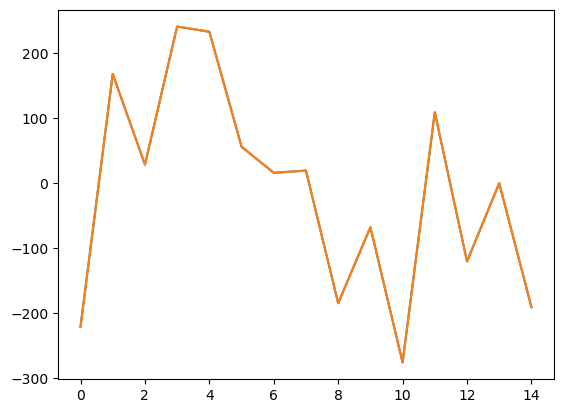

[ 224.8254    313.76218    49.658726  395.36804   483.57843   201.88554
   66.237724   84.4508   -180.67729   -43.55907  -238.20438   184.11331
  -47.652752   42.168686 -163.09315 ]
[ 225.37230136  314.27638795   49.6300277   395.35118948  484.38356201
  202.27575725   66.12776516   84.05093362 -180.61937368  -43.53925094
 -237.71537021  184.34557867  -47.41336878   42.49366511 -162.71516518]


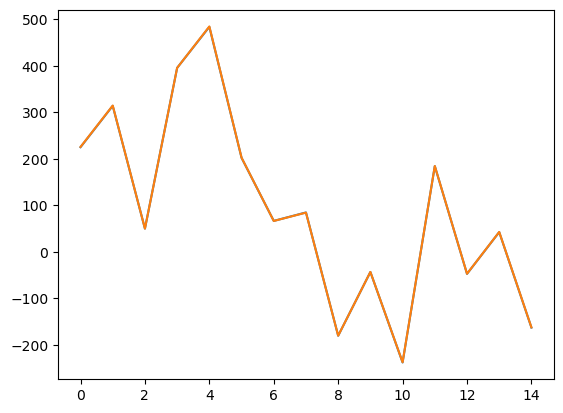

[ 488.55597    322.1613      55.80822    446.80444    434.5716
  108.214325    32.687607    43.403065  -186.86684    -71.30946
 -278.5899     110.19046   -118.93996      2.4023418 -192.31902  ]
[ 487.89354974  321.35563349   55.39701486  446.91569336  433.8040236
  108.70205383   32.7572439    42.98322637 -186.80334261  -71.17592384
 -278.44327085  109.8760115  -118.89743693    2.12203882 -192.24645624]


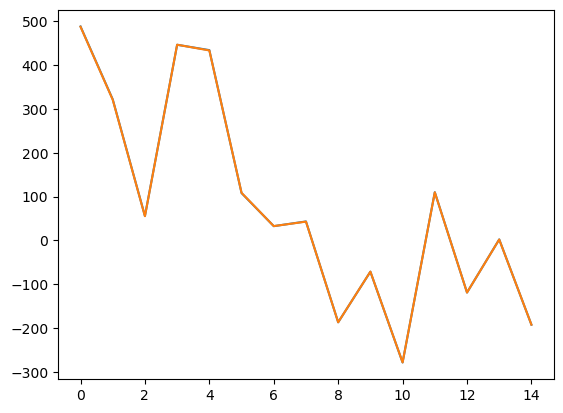

In [5]:
y_pred = model_I.predict(X_test_scaled)
print(y_pred.shape)

for i in range(10):
    plt.figure()
    print(y_pred[i,:])
    plt.plot(range(15),y_pred[i,:])
    print(y_test[i,:])
    plt.plot(range(15),y_test[i,:])
    plt.show()

In [6]:
model_abs = NN_Model()
model_abs.load_model('models/model_VoltageSignal_fft_abs.keras')

model_angle = NN_Model()
model_angle.load_model('models/model_VoltageSignal_fft_angle.keras')

model_nn = NN_Model()
model_nn.load_model('models/model_VoltageSignal.keras')

In [7]:
# Preprocessing
data_processor_I = preprocessing('./config_I.json')

X_I, y_I = data_processor_I.scale_new_data(X_test, data_processor_I.y_test)

(640, 150)
(160, 150)
(160, 150)


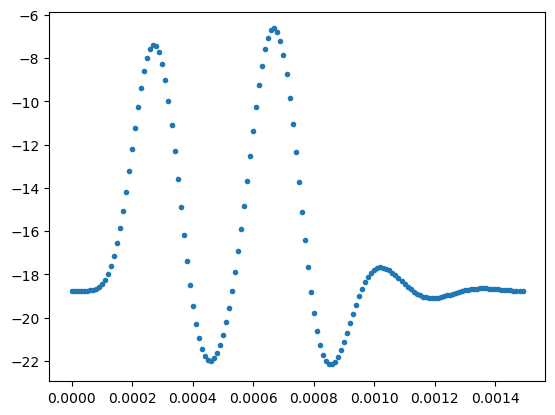

In [14]:
x_nn = X_test_scaled[0,:]
y_nn = data_processor.y_series_test[0].reshape((150,1))

plt.plot(data_processor_I.time, y_nn,'.')

[[-166.67474 ]
 [ 205.37737 ]
 [  33.494804]
 [ 257.98697 ]
 [ 290.07504 ]
 [  99.88932 ]
 [  30.836576]
 [  39.478012]
 [-182.85835 ]
 [ -54.777184]
 [-252.47481 ]
 [ 159.18028 ]
 [ -70.41439 ]
 [  30.6658  ]
 [-165.7346  ]]


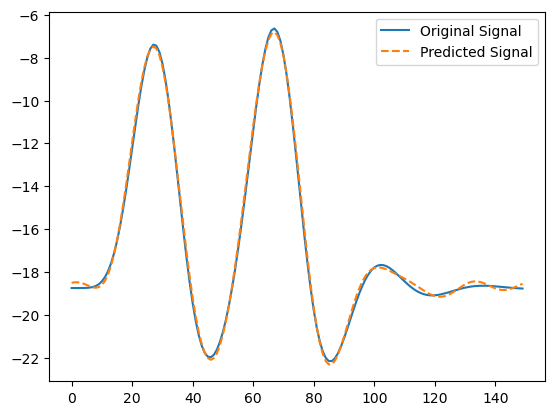

False


<Figure size 640x480 with 0 Axes>

In [18]:
fft_values = np.fft.fft(y_nn)
truncated_fft = np.zeros((fft_values.shape), dtype=complex)

predict = model_abs.predict(np.array([x])).reshape((15,1))
print(predict)

mean = 0.1*predict[0]
abs_ = predict[1:8]
angle_ = 0.01*predict[8:]

truncated_fft[1:8] = abs_*(np.cos(angle_)+1j*np.sin(angle_))
truncated_fft[-7:] = abs_[-1::-1][:7] * (np.cos(angle_[-1::-1][:7]) - 1j * np.sin(angle_[-1::-1][:7]))
# print(truncated_fft[:4])
# print(fft_values[:4])
reconstructed_signal = mean+np.fft.ifft(truncated_fft.flatten())
# print(fft_values)
#     # Compute the error
#     error = y.flatten() - reconstructed_signal.real.flatten()

# Plotting the original and reconstructed signals
plt.figure()
plt.plot(range(150), y_nn.flatten(), label='Original Signal')
plt.plot(range(150), reconstructed_signal.real.flatten(), label='Predicted Signal', linestyle='--')
plt.legend()
plt.show()
plt.savefig('opt.png')

print(np.allclose(truncated_fft[1:8], (truncated_fft[-1:-8:-1])))


#     # Plotting the error
#     ax2.plot(time, error, color='red')
#     ax2.set_ylim((-10,10))
#     ax2.set_title('Reconstruction Error')
#     ax2.set_xlabel('Time [s]')
#     ax2.set_ylabel('Error')
